## Problem Statement:- 


A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

-Which variables are significant in predicting the price of a house, and

-How well those variables describe the price of a house.

 

-Also, determine the optimal value of lambda for ridge and lasso regression.

## Step 1: Reading and Understanding the Data

In [2]:
#supress warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV



In [4]:
#Importing Dataset

dataset=pd.read_csv("C:/Users/Shaye/OneDrive/Desktop/Advance Regression Assignment/train.csv")

In [5]:
# Changing default display options for better visibility of data

pd.options.display.max_colwidth = 255
pd.options.display.max_rows=225


In [6]:
#Displaying the data

dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
# Check the head of the dataset

dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
#checking the size of the dataset

dataset.shape

(1460, 81)

In [9]:
#Inspecting columns of the dataset

dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
#checking the descriptive information of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
#checking the summary statistics of the dataset

dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [12]:
#getting the count of each element in the data

dataset.count()

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
Street           1460
Alley              91
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual      1460
OverallCond      1460
YearBuilt        1460
YearRemodAdd     1460
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
MasVnrType       1452
MasVnrArea       1452
ExterQual        1460
ExterCond        1460
Foundation       1460
BsmtQual         1423
BsmtCond         1423
BsmtExposure     1422
BsmtFinType1     1423
BsmtFinSF1       1460
BsmtFinType2     1422
BsmtFinSF2       1460
BsmtUnfSF        1460
TotalBsmtSF      1460
Heating          1460
HeatingQC        1460
CentralAir       1460
Electrical       1459
1stFlrSF         1460
2ndFlrSF         1460
LowQualFin

## Step 2: Data Cleaning

In [13]:
#Detecting missing values

dataset.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Removing/Imputing NaN values in Categorical attributes¶


In [14]:
#check for null values in all categorical columns

dataset.select_dtypes(include='object').isnull().sum()[dataset.select_dtypes(include='object').isnull().sum()>0]

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [15]:
#replacing NA with None in following columns:

for col in ('Alley','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature'):
    dataset[col]=dataset[col].fillna('None')

In [16]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


### Here we will remove categorical attributes that have more than 85% data associated to one value.
- We will remove any column that has one value repeating 1241 times (1241/1450)*100 = 85%) as this column would be skewed
  to one value

In [17]:
# Dropping the following columns that have more than 85% values associated to a specific value

def getHighCategoricalValueCounts():
    column=[]
    categorical_columns=dataset.select_dtypes(include=['object'])
    for col in (categorical_columns):
        if(dataset[col].value_counts().max() >=1241):
            column.append(col)
    return column
columnsToBeRemoved=getHighCategoricalValueCounts()

In [18]:
#removing the columns with skewewd data

dataset.drop(columnsToBeRemoved, axis=1, inplace=True)


In [19]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,2,2008,Normal,208500
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,0,None,0,5,2007,Normal,181500
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,0,None,0,9,2008,Normal,223500
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,272,0,0,0,None,0,2,2006,Abnorml,140000
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,0,None,0,12,2008,Normal,250000


In [20]:
#re-checking for null values in all categorical columns

dataset.select_dtypes(include='object').isnull().sum()[dataset.select_dtypes(include='object').isnull().sum()>0]

Series([], dtype: int64)

### There are no more null values in categorical columns

In [21]:
#checking the null values in numerical data

dataset.select_dtypes(include=['int64','float']).isnull().sum()[dataset.select_dtypes(include=['int64','float']).isnull()
                                                                  .sum()>0]

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [22]:
# Imputing the null values with median values for LotFrontage and MasVnrArea columns

dataset['LotFrontage']=dataset['LotFrontage'].replace(np.nan, dataset['LotFrontage'].median())
dataset['MasVnrArea'] = dataset['MasVnrArea'].replace(np.nan, dataset['MasVnrArea'].median())

In [23]:
# Setting the null values with 0 for GarageYrBlt for now as we would be handling this column further below

dataset['GarageYrBlt']=dataset['GarageYrBlt'].fillna(0)
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].astype(int)

In [24]:
#Creating a new column named IsRemodelled - This column would determine whether the house has been remodelled or not based on 
#the difference between remodelled and built years

def checkForRemodel(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return 0
    elif(row['YearBuilt'] < row['YearRemodAdd']):
        return 1
    else:
        return 2
    
dataset['IsRemodelled'] = dataset.apply(checkForRemodel, axis=1)
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,2,2008,Normal,208500,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,0,None,0,5,2007,Normal,181500,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,0,None,0,9,2008,Normal,223500,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,0,None,0,2,2006,Abnorml,140000,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,0,None,0,12,2008,Normal,250000,0


In [25]:
# Creating a new column named BuiltOrRemodelledAge and determining the age of the building at the time of selling

def getBuiltOrRemodelAge(row):
    if(row['YearBuilt'] == row['YearRemodAdd']):
        return row['YrSold'] - row['YearBuilt']
    else:
        return row['YrSold'] - row['YearRemodAdd']
       
dataset['BuiltOrRemodelAge'] = dataset.apply(getBuiltOrRemodelAge, axis=1)
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,2008,Normal,208500,0,5
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,2007,Normal,181500,0,31
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,2008,Normal,223500,1,6
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,2006,Abnorml,140000,1,36
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,2008,Normal,250000,0,8


In [26]:
# Create a new column which would indicate if the Garage is old or new.
# Garage Yr Built less than 2000 will be considered as old (0) else new(1). 
# For GarageYrBuilt , where we have imputed the value as 0 will also be treated as old.

def getGarageConstructionPeriod(row):
    if row == 0:
        return 0
    elif row >= 1900 and row < 2000:        
        return 0
    else:   
        return 1
    
dataset['OldOrNewGarage'] = dataset['GarageYrBlt'].apply(getGarageConstructionPeriod)
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,None,0,2,2008,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,None,0,5,2007,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,None,0,9,2008,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,None,0,2,2006,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,None,0,12,2008,Normal,250000,0,8,1


In [27]:
# Since we have created new features from YearBuilt, YearRemodAdd, YrSold and GarageYrBlt, we can drop these columns as we 
# would only be using the derived columns for further analysis

dataset.drop(['YearBuilt', 'YearRemodAdd', 'YrSold', 'GarageYrBlt'], axis = 1, inplace = True)


In [28]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,2,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,0,0,None,0,5,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,0,0,None,0,9,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,0,0,None,0,2,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,0,0,None,0,12,Normal,250000,0,8,1


### We will be removing numerical attributes that have more than 85% data associated to one value.
- We will remove any column that has one value repeating 1241 times (1241/1450)*100 = 85%) as this column would be skewed
  to one value

In [29]:
# Drop the following columns that have more than 85% values associated to a specific value
# We will also drop MoSold as we will not be using that for further analysis

def getHighNumericalValueCounts():
    column = []
    numerical_columns = dataset.select_dtypes(include=['int64', 'float'])
    for col in (numerical_columns):
        if(dataset[col].value_counts().max() >= 1241):
            column.append(col)
    return column

columnsToBeRemoved = getHighNumericalValueCounts()
dataset.drop(columnsToBeRemoved, axis = 1, inplace = True)

dataset.drop(['MoSold'], axis = 1, inplace = True)

dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,2,548,0,61,None,Normal,208500,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,2,460,298,0,None,Normal,181500,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,2,608,0,42,None,Normal,223500,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,3,642,0,35,None,Abnorml,140000,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,3,836,192,84,None,Normal,250000,0,8,1


In [30]:
# Let's check for percentage of null values in each column

dataset.isnull().sum()

Id                   0
MSSubClass           0
MSZoning             0
LotFrontage          0
LotArea              0
LotShape             0
LotConfig            0
Neighborhood         0
BldgType             0
HouseStyle           0
OverallQual          0
OverallCond          0
RoofStyle            0
Exterior1st          0
Exterior2nd          0
MasVnrType           0
MasVnrArea           0
ExterQual            0
Foundation           0
BsmtQual             0
BsmtExposure         0
BsmtFinType1         0
BsmtFinSF1           0
BsmtUnfSF            0
TotalBsmtSF          0
HeatingQC            0
1stFlrSF             0
2ndFlrSF             0
GrLivArea            0
BsmtFullBath         0
FullBath             0
HalfBath             0
BedroomAbvGr         0
KitchenQual          0
TotRmsAbvGrd         0
Fireplaces           0
FireplaceQu          0
GarageType           0
GarageFinish         0
GarageCars           0
GarageArea           0
WoodDeckSF           0
OpenPorchSF          0
Fence      

### There are no null values in the dataset

In [31]:
# Check if there are any duplicate values in the dataset

dataset[dataset.duplicated(keep=False)]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage


#### There are no duplicate values in the dataset

### Outlier treatment

In [32]:
# Checking outliers at 25%,50%,75%,90%,95% and above

dataset.describe(percentiles=[.25,.5,.75,.90,.95,.99])


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,567.240411,1057.429452,...,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,180921.195890,0.476712,22.950000,0.275342
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,441.866955,438.705324,...,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,79442.502883,0.499629,20.640653,0.446840
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,-1.000000,0.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,...,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,129975.000000,0.000000,4.000000,0.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,...,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,163000.000000,0.000000,14.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,808.000000,1298.250000,...,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,214000.000000,1.000000,41.000000,1.000000
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,335.000000,1065.500000,1232.000000,1602.200000,...,9.000000,1.000000,3.000000,757.100000,262.000000,130.000000,278000.000000,1.000000,56.000000,1.000000
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,456.000000,1274.000000,1468.000000,1753.000000,...,10.000000,2.000000,3.000000,850.100000,335.000000,175.050000,326100.000000,1.000000,58.000000,1.000000
99%,1445.410000,190.000000,137.410000,37567.640000,10.000000,9.000000,791.280000,1572.410000,1797.050000,2155.050000,...,11.000000,2.000000,3.000000,1002.790000,505.460000,285.820000,442567.010000,1.000000,60.000000,1.000000


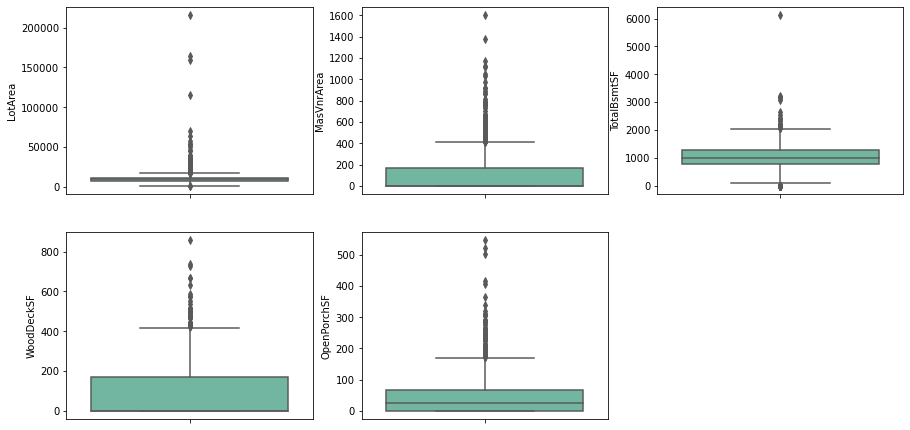

In [33]:
#checking the outliers in numerical columns

plt.figure(figsize=(15, 20))
plt.subplot(5,3,1)
sns.boxplot(y = 'LotArea', palette='Set2', data = dataset)
plt.subplot(5,3,2)
sns.boxplot(y = 'MasVnrArea', palette='Set2', data = dataset)
plt.subplot(5,3,3)
sns.boxplot(y = 'TotalBsmtSF', palette='Set2', data = dataset)
plt.subplot(5,3,4)
sns.boxplot(y = 'WoodDeckSF', palette='Set2', data = dataset)
plt.subplot(5,3,5)
sns.boxplot(y = 'OpenPorchSF', palette='Set2', data = dataset)
plt.show()

#### Now we will remove outliers

In [34]:
# Removing values beyond 98% for LotArea

nn_quartile_LotArea = dataset['LotArea'].quantile(0.98)
dataset = dataset[dataset["LotArea"] < nn_quartile_LotArea]


In [35]:
# Removing values beyond 98% for MasVnrArea

nn_quartile_LotArea = dataset['MasVnrArea'].quantile(0.98)
dataset = dataset[dataset["MasVnrArea"] < nn_quartile_LotArea]


In [36]:
# Removing values beyond 99% for TotalBsmtSF

nn_quartile_LotArea = dataset['TotalBsmtSF'].quantile(0.99)
dataset = dataset[dataset["TotalBsmtSF"] < nn_quartile_LotArea]

In [37]:
# Removing values beyond 99% for WoodDeckSF

nn_quartile_LotArea = dataset['WoodDeckSF'].quantile(0.99)
dataset = dataset[dataset["WoodDeckSF"] < nn_quartile_LotArea]

In [38]:
# Removing values beyond 99% for OpenPorchSF

nn_quartile_LotArea = dataset['OpenPorchSF'].quantile(0.99)
dataset = dataset[dataset["OpenPorchSF"] < nn_quartile_LotArea]

In [39]:
#Let's determine the percentage of data retained

num_data = round(100*(len(dataset)/1460),2)
num_data

93.01

## Step 3: Data Visualization

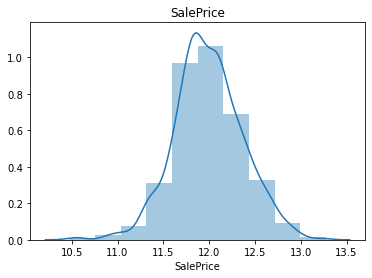

In [40]:
# Visualising the target variable -> SalePrice after transforming the sales price

dataset['SalePrice'] = np.log1p(dataset['SalePrice'])

plt.title('SalePrice')
sns.distplot(dataset['SalePrice'], bins=10)
plt.show()

#### The target value seems to be normalized with some noise.

<Figure size 720x360 with 0 Axes>

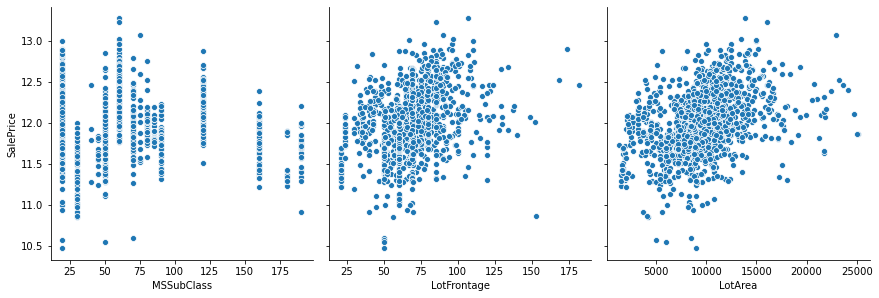

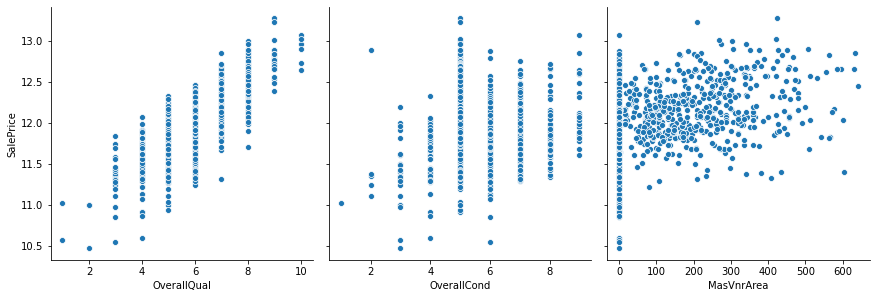

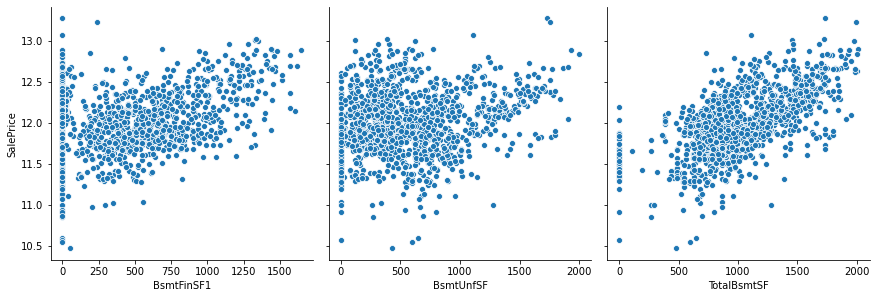

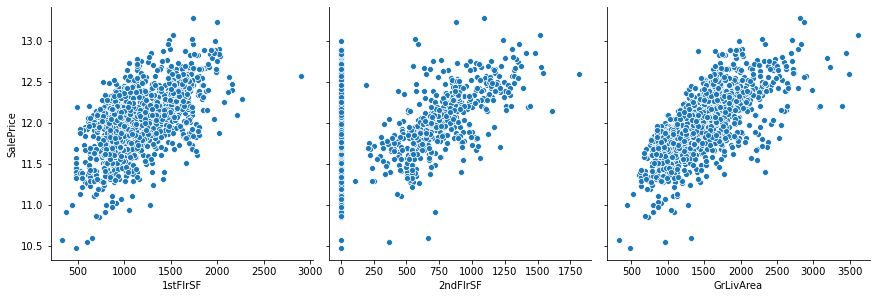

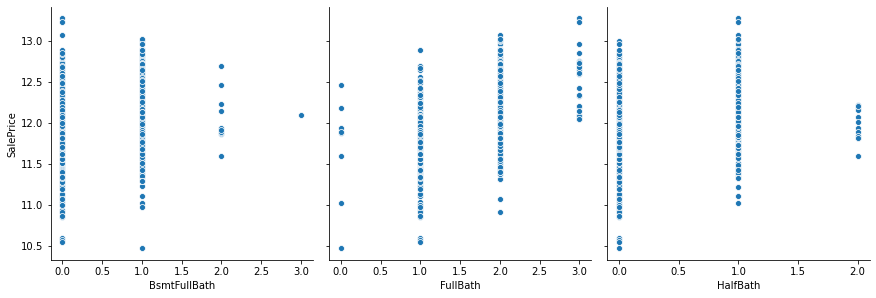

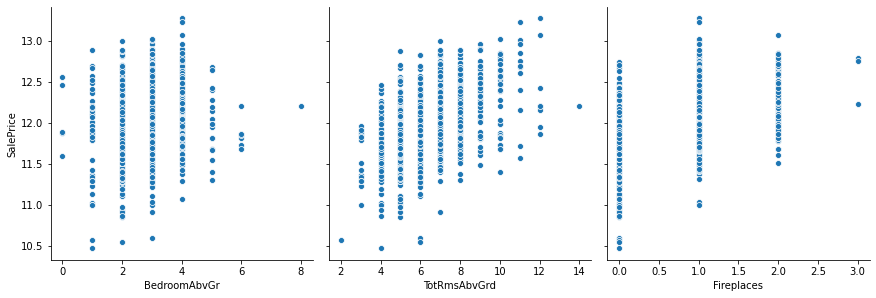

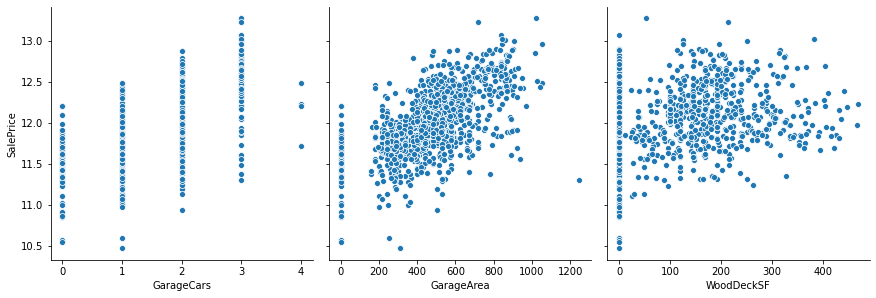

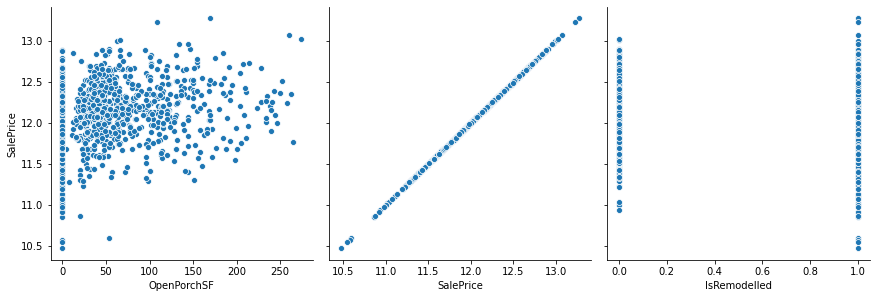

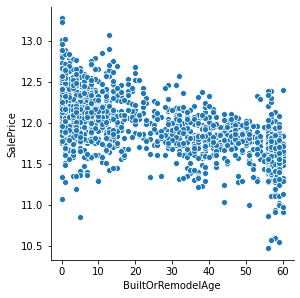

In [41]:
#Let's check numerical values using pair-plots

plt.figure(figsize=(10,5))
sns.pairplot(dataset, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(dataset, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(dataset, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(dataset, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(dataset, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(dataset, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(dataset, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(dataset, x_vars=['OpenPorchSF','SalePrice', 'IsRemodelled'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(dataset, x_vars=['BuiltOrRemodelAge'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

### Observations :

- 1stFlrSF, GrLivArea seems to be showing correlation towards right
- Rest of the variables are too scattered and hence can be understood during further analysis

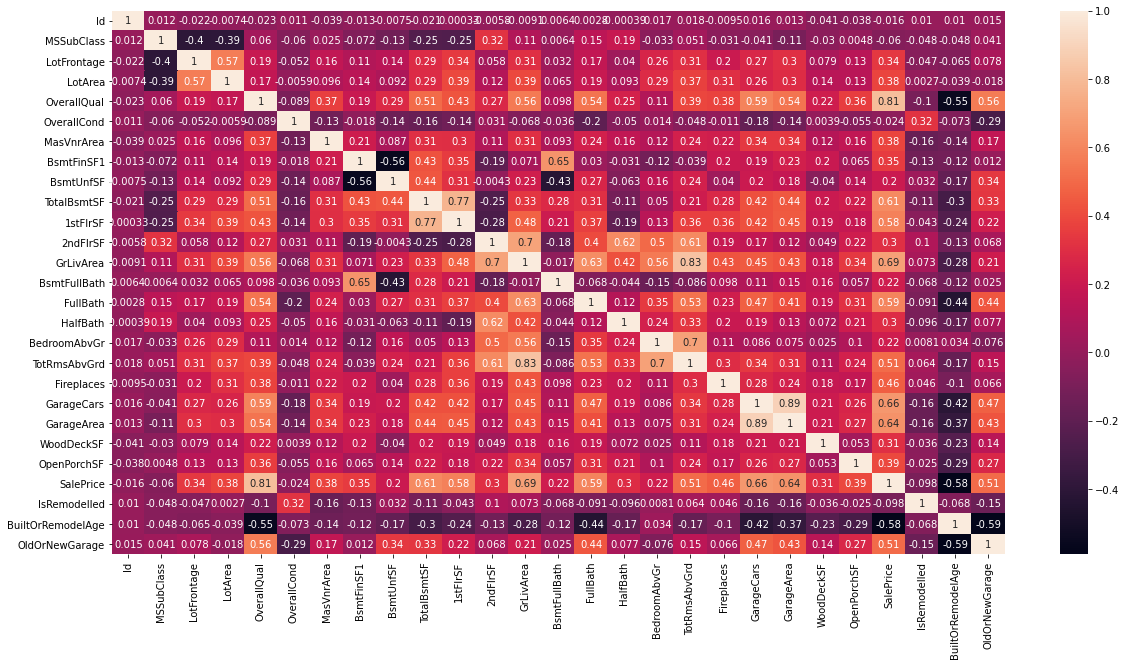

In [42]:
#let's check the correlation of numerical columns

plt.figure(figsize = (20, 10))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

#### Removing following columns which shows high correlation
- TotRmsAbvGrd and GrLivArea show 82%
- Garage Area and Garage Cars show 88%

In [43]:
#Let's remove highly correlated variables

dataset.drop(['TotRmsAbvGrd', 'GarageArea'], axis = 1, inplace = True)


In [44]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,Fence,SaleCondition,SalePrice,IsRemodelled,BuiltOrRemodelAge,OldOrNewGarage
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,RFn,2,0,61,None,Normal,12.247699,0,5,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,RFn,2,298,0,None,Normal,12.109016,0,31,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,RFn,2,0,42,None,Normal,12.317171,1,6,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,Unf,3,0,35,None,Abnorml,11.849405,1,36,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,RFn,3,192,84,None,Normal,12.429220,0,8,1


In [45]:
#let's check the shape of the dataset

dataset.shape

(1358, 47)

## Step 4: Data Preparation

#### Converting categorical variables into numerical variables

In [46]:
# For values which can be ordered, we have given an ordered sequence value
# For values which cannot be ordered, we have categorised them into 0 and 1

dataset['d_LotShape'] = dataset['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
dataset['d_ExterQual'] = dataset['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
dataset['d_BsmtQual'] = dataset['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
dataset['d_BsmtExposure'] = dataset['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
dataset['d_BsmtFinType1'] = dataset['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 
                                                                 'None': 0})
dataset['d_HeatingQC'] = dataset['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
dataset['d_KitchenQual'] = dataset['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
dataset['d_FireplaceQu'] = dataset['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
dataset['d_GarageFinish'] = dataset['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0 })
dataset['d_BldgType'] = dataset['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1, 
                                                                 'None': 0 })
dataset['d_HouseStyle'] = dataset['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, 
                                                                 '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
dataset['d_Fence'] = dataset['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'None': 0 })
dataset['d_LotConfig'] = dataset['LotConfig'].map({'Inside': 5, 'Corner': 4, 'CulDSac': 3, 'FR2': 2, 'FR3': 1, 
                                                           'None': 0  })
dataset['d_MasVnrType'] = dataset['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
dataset['d_SaleCondition'] = dataset['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0, 
                                                                   'Alloca': 0, 'AdjLand': 0, 'None': 0})
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,...,5,4,0,2,1,4,0,5,1,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,...,5,3,3,2,1,1,0,2,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,...,5,4,3,2,1,4,0,5,1,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,...,4,4,4,1,1,4,0,4,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,...,5,4,3,2,1,4,0,2,1,1


In [47]:
# we will drop the old columns from which the new columns were derived
# We can also drop the id column as it will not be used any more

dataset = dataset.drop(['Id', 'LotShape', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 
                                'KitchenQual', 'FireplaceQu', 'GarageFinish', 'BldgType', 'HouseStyle', 'Fence', 
                                'LotConfig', 'MasVnrType', 'SaleCondition'], axis=1)


In [48]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,d_HeatingQC,d_KitchenQual,d_FireplaceQu,d_GarageFinish,d_BldgType,d_HouseStyle,d_Fence,d_LotConfig,d_MasVnrType,d_SaleCondition
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,0,2,1,4,0,5,1,1
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,5,3,3,2,1,1,0,2,0,1
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,5,1,1
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,4,4,4,1,1,4,0,4,0,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,5,4,3,2,1,4,0,2,1,1


In [49]:
# We will create dummy variables for the following columns

d_MSZoning = pd.get_dummies(dataset['MSZoning'], prefix='MSZoning', drop_first = True)
dataset = pd.concat([dataset, d_MSZoning], axis = 1)

d_Neighborhood = pd.get_dummies(dataset['Neighborhood'], prefix='Neighborhood', drop_first = True)
dataset = pd.concat([dataset, d_Neighborhood], axis = 1)

d_RoofStyle = pd.get_dummies(dataset['RoofStyle'], prefix='RoofStyle', drop_first = True)
dataset = pd.concat([dataset, d_RoofStyle], axis = 1)

d_Exterior1st = pd.get_dummies(dataset['Exterior1st'], prefix='Exterior1st', drop_first = True)
dataset = pd.concat([dataset, d_Exterior1st], axis = 1)

d_Exterior2nd = pd.get_dummies(dataset['Exterior2nd'], prefix='Exterior2nd', drop_first = True)
dataset = pd.concat([dataset, d_Exterior2nd], axis = 1)

d_Foundation = pd.get_dummies(dataset['Foundation'], prefix='Foundation', drop_first = True)
dataset = pd.concat([dataset, d_Foundation], axis = 1)

d_GarageType = pd.get_dummies(dataset['GarageType'], prefix='GarageType', drop_first = True)
dataset = pd.concat([dataset, d_GarageType], axis = 1)

dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,RL,65.0,8450,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Veenker,6,8,Gable,MetalSd,MetalSd,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,CollgCr,7,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,Crawfor,7,5,Gable,Wd Sdng,Wd Shng,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,NoRidge,8,5,Gable,VinylSd,VinylSd,...,1,0,0,0,1,0,0,0,0,0


In [50]:
# dropping the below columns as we now have new columns derived from these columns

dataset = dataset.drop(['MSZoning', 'Neighborhood', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'Foundation', 
                                'GarageType'], axis=1)
dataset.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [51]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1358 entries, 0 to 1458
Columns: 112 entries, MSSubClass to GarageType_None
dtypes: float64(3), int64(36), uint8(73)
memory usage: 521.2 KB


#### All the columns in the dataset are numeric

In [52]:
dataset.shape

(1358, 112)

## Step 5: Train Test Split

In [53]:
# Putting all feature variable to X

X = dataset.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None
0,60,65.0,8450,7,5,196.0,706,150,856,856,...,1,0,0,0,1,0,0,0,0,0
1,20,80.0,9600,6,8,0.0,978,284,1262,1262,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,7,5,162.0,486,434,920,920,...,1,0,0,0,1,0,0,0,0,0
3,70,60.0,9550,7,5,0.0,216,540,756,961,...,0,0,0,0,0,0,0,0,1,0
4,60,84.0,14260,8,5,350.0,655,490,1145,1145,...,1,0,0,0,1,0,0,0,0,0


In [54]:
# Putting response variable to y

y = dataset['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [55]:
# Scaling the Features

# storing column names in cols
# scaling (the dataframe is converted to a numpy array)

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None'],
      dtype='object', length=111)

In [56]:
#splitting train and test data with 70-30

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=42)

## Step 5: Recursive Feature Elimination (RFE)

In [57]:
# Since there are around 111 features, we will use RFE to get the best 50 features out of the 111 features and use the new
#features for further analysis

In [58]:
# Running RFE with the output number of the variable equal to 50

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [59]:
# running RFE

rfe = RFE(lm, 50)            
rfe = rfe.fit(X_train, y_train)

In [60]:
# Assign the columns selected by RFE to cols

col = X_train.columns[rfe.support_]


In [61]:
# assign the 50 features selected using RFE to a dataframe and view them

temporary_data=pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
temporary_data = temporary_data.loc[temporary_data['rfe_support'] == True]
temporary_data.reset_index(drop=True, inplace=True)


In [62]:
temporary_data

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtFinSF1,True,1
4,TotalBsmtSF,True,1
5,1stFlrSF,True,1
6,2ndFlrSF,True,1
7,GrLivArea,True,1
8,BsmtFullBath,True,1
9,FullBath,True,1


In [63]:
# Assign the 50 columns to X_train_rfe

X_train_rfe = X_train[col]


In [64]:
# Associate the new 50 columns to X_train and X_test for further analysis

X_train = X_train_rfe[X_train_rfe.columns]
X_test =  X_test[X_train.columns]


## Step 6: Model Building and Evaluation

### Ridge

In [65]:
# list pf alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [66]:
ridge = Ridge()


In [67]:
#Cross Validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    1.4s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [68]:
#Display the mean scores
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)


In [69]:
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]


In [70]:
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


,param_alpha,mean_train_score,mean_test_score,rank_test_score
16,5,-0.077755,-0.083854,1
17,6,-0.077806,-0.083862,2
18,7,-0.077856,-0.083877,3
19,8,-0.077903,-0.083890,4
15,4,-0.077707,-0.083897,5
20,9,-0.077949,-0.083902,6
21,10,-0.077992,-0.083919,7
14,3,-0.077660,-0.083976,8
22,20,-0.078320,-0.084037,9
13,2,-0.077612,-0.084070,10


In [71]:
# plotting mean test and train scoes with alpha 

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')


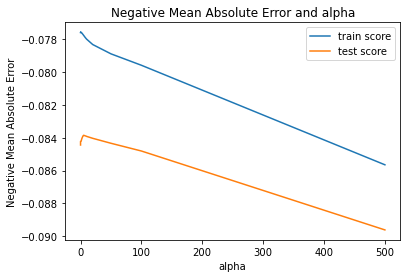

In [72]:
#Plotting

plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [73]:
# get the best estimator for lambda

ridge_model_cv.best_estimator_


Ridge(alpha=5.0)

In [74]:
# check the coefficient values with lambda = 5

alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.02247529,  0.06795649,  0.04519303,  0.02782618,  0.04555175,
        0.01495396,  0.01028191,  0.08786825,  0.01085749,  0.01053191,
        0.02007959,  0.02072325,  0.03632515,  0.00987974, -0.01170449,
       -0.01735467,  0.01442899,  0.01284615,  0.01645782,  0.00754077,
        0.01883437,  0.01632599,  0.01476   , -0.02003493,  0.01453058,
        0.06798595,  0.02715921,  0.10427926,  0.07601091,  0.02640327,
       -0.0109229 , -0.00840447,  0.02370646, -0.01507464, -0.00954319,
        0.01766504, -0.00946776, -0.01344567,  0.01272916, -0.04120739,
       -0.03176261,  0.01284558, -0.01709334,  0.03654422,  0.02135067,
        0.02175123,  0.04355618,  0.01789197,  0.00682514, -0.00945535])

In [75]:
y_train_pred= ridge.predict(X_train)
y_test_pred=ridge.predict(X_test)

#### Checking the r2 value

In [76]:
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9189940223734436
0.9020030955419676


In [77]:

#checking the mean squared error

mean_squared_error(y_test, ridge.predict(X_test))


0.013633610832326911

In [78]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':ridge.coef_.round(4)})


In [79]:
ridge_df.reset_index(drop=True, inplace=True)


In [80]:
ridge_df


,Features,Coefficient
0,LotArea,0.0225
1,OverallQual,0.0680
2,OverallCond,0.0452
3,BsmtFinSF1,0.0278
4,TotalBsmtSF,0.0456
5,1stFlrSF,0.0150
6,2ndFlrSF,0.0103
7,GrLivArea,0.0879
8,BsmtFullBath,0.0109
9,FullBath,0.0105


In [81]:
# Assign the Features and their coefficient values to a dictionary which would be used while plotting the bar plot

ridge_coeff_dict = dict(pd.Series(ridge.coef_.round(4), index = X_train.columns))


In [82]:
ridge_coeff_dict


{'LotArea': 0.0225,
 'OverallQual': 0.068,
 'OverallCond': 0.0452,
 'BsmtFinSF1': 0.0278,
 'TotalBsmtSF': 0.0456,
 '1stFlrSF': 0.015,
 '2ndFlrSF': 0.0103,
 'GrLivArea': 0.0879,
 'BsmtFullBath': 0.0109,
 'FullBath': 0.0105,
 'HalfBath': 0.0201,
 'Fireplaces': 0.0207,
 'GarageCars': 0.0363,
 'WoodDeckSF': 0.0099,
 'IsRemodelled': -0.0117,
 'BuiltOrRemodelAge': -0.0174,
 'OldOrNewGarage': 0.0144,
 'd_BsmtQual': 0.0128,
 'd_BsmtExposure': 0.0165,
 'd_BsmtFinType1': 0.0075,
 'd_HeatingQC': 0.0188,
 'd_KitchenQual': 0.0163,
 'd_GarageFinish': 0.0148,
 'd_BldgType': -0.02,
 'd_SaleCondition': 0.0145,
 'MSZoning_FV': 0.068,
 'MSZoning_RH': 0.0272,
 'MSZoning_RL': 0.1043,
 'MSZoning_RM': 0.076,
 'Neighborhood_Crawfor': 0.0264,
 'Neighborhood_Edwards': -0.0109,
 'Neighborhood_MeadowV': -0.0084,
 'Neighborhood_NridgHt': 0.0237,
 'Neighborhood_OldTown': -0.0151,
 'Neighborhood_SWISU': -0.0095,
 'Neighborhood_StoneBr': 0.0177,
 'Exterior1st_BrkComm': -0.0095,
 'Exterior1st_CemntBd': -0.0134,
 'Exte

In [83]:
# Do an RFE to minimise the features to 15

X_train_ridge = X_train[ridge_df.Features]


In [84]:

lm = LinearRegression()
lm.fit(X_train_ridge, y_train)

LinearRegression()

In [85]:
# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_ridge, y_train)

In [86]:
# getting the coefficient values

def find(x):
    return ridge_coeff_dict[x]

# Assigning top 10 features to a temporary_data1 dataframe for further display in the bar plot

temporary_data1 = pd.DataFrame(list(zip( X_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temporary_data1 = temporary_data1.loc[temporary_data1['rfe_support'] == True]
temporary_data1.reset_index(drop=True, inplace=True)

temporary_data1['Coefficient'] = temporary_data1['Features'].apply(find)
temporary_data1 = temporary_data1.sort_values(by=['Coefficient'], ascending=False)
temporary_data1 = temporary_data1.head(10)
temporary_data1

,Features,rfe_support,rfe_ranking,Coefficient
10,MSZoning_RL,True,1,0.1043
5,GrLivArea,True,1,0.0879
11,MSZoning_RM,True,1,0.0760
1,OverallQual,True,1,0.0680
9,MSZoning_FV,True,1,0.0680
4,TotalBsmtSF,True,1,0.0456
2,OverallCond,True,1,0.0452
14,Foundation_PConc,True,1,0.0436
7,GarageCars,True,1,0.0363
3,BsmtFinSF1,True,1,0.0278


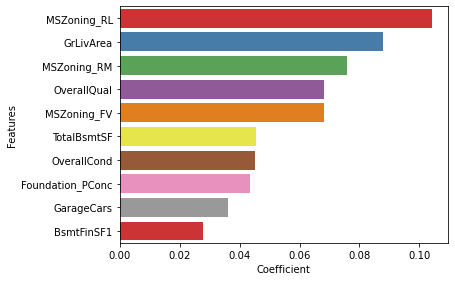

In [87]:
# Let's plot a bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temporary_data1)
plt.show()

#### The above graph displays the top 10 variables based on the Ridge Regression model that are significant in predicting the price of a house.



### Lasso

In [88]:
lasso = Lasso()


In [89]:
# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}


In [90]:
#cross validation

folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [91]:
#displaying the mean scores

lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)


In [92]:
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])


,param_alpha,mean_train_score,mean_test_score,rank_test_score
3,0.0004,-0.077845,-0.084082,1
2,0.0003,-0.077752,-0.084122,2
4,0.0005,-0.077966,-0.084124,3
1,0.0002,-0.077675,-0.084196,4
0,0.0001,-0.077606,-0.084286,5
5,0.001,-0.078658,-0.084649,6
6,0.002,-0.079585,-0.085257,7
7,0.003,-0.080151,-0.085618,8
8,0.004,-0.080639,-0.086056,9
9,0.005,-0.081208,-0.086511,10


In [93]:
#plotting mean test and train scores with alpha

lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')


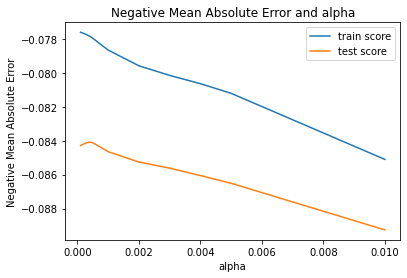

In [94]:
#Plotting

plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [95]:
#getting the best estimator for lambda

lasso_model_cv.best_estimator_


Lasso(alpha=0.0004)

In [96]:
# checking the coefficient values with lambda = 0.0004

alpha = 0.0004


lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([ 0.02209   ,  0.06965615,  0.04499187,  0.02857128,  0.04617356,
        0.00589288, -0.        ,  0.10018134,  0.01012931,  0.00903681,
        0.01910648,  0.02061525,  0.03680238,  0.00969557, -0.01141099,
       -0.01760434,  0.01381252,  0.01187995,  0.01644408,  0.00693116,
        0.01831145,  0.01614689,  0.01498323, -0.01936956,  0.01447596,
        0.06889636,  0.02711608,  0.10656541,  0.07644758,  0.02578236,
       -0.01048374, -0.0078987 ,  0.02272991, -0.01484452, -0.0096969 ,
        0.01670877, -0.00927381, -0.        ,  0.01212285, -0.03116947,
       -0.02947411,  0.        , -0.01640651,  0.02694071,  0.01853022,
        0.01949665,  0.04186531,  0.01670137,  0.00626478, -0.0089319 ])

In [97]:
y_train_pred= lasso.predict(X_train)
y_test_pred=lasso.predict(X_test)

#### Checking the r2 value

In [98]:
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9188514370862617
0.9031919911918014


In [99]:
#getting the mean squared error

mean_squared_error(y_test, lasso.predict(X_test))


0.013468208254564639

In [100]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df


,Features,Coefficient
0,LotArea,0.0221
1,OverallQual,0.0697
2,OverallCond,0.0450
3,BsmtFinSF1,0.0286
4,TotalBsmtSF,0.0462
5,1stFlrSF,0.0059
6,GrLivArea,0.1002
7,BsmtFullBath,0.0101
8,FullBath,0.0090
9,HalfBath,0.0191


In [101]:
# Put the Features and Coefficients in dictionary

lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = X_train.columns))
lasso_coeff_dict


{'LotArea': 0.022089999224203648,
 'OverallQual': 0.06965615091049743,
 'OverallCond': 0.04499186911162908,
 'BsmtFinSF1': 0.02857127590971909,
 'TotalBsmtSF': 0.04617355521410605,
 '1stFlrSF': 0.005892878217074826,
 '2ndFlrSF': -0.0,
 'GrLivArea': 0.10018133511162265,
 'BsmtFullBath': 0.010129306271065017,
 'FullBath': 0.009036809500542187,
 'HalfBath': 0.019106482229354453,
 'Fireplaces': 0.020615253870428066,
 'GarageCars': 0.036802382758918235,
 'WoodDeckSF': 0.009695570943808535,
 'IsRemodelled': -0.011410994029951264,
 'BuiltOrRemodelAge': -0.017604335236860048,
 'OldOrNewGarage': 0.013812523385876161,
 'd_BsmtQual': 0.011879947399302268,
 'd_BsmtExposure': 0.016444083613428157,
 'd_BsmtFinType1': 0.006931160628862942,
 'd_HeatingQC': 0.018311453370271336,
 'd_KitchenQual': 0.016146894247203884,
 'd_GarageFinish': 0.014983230938384535,
 'd_BldgType': -0.019369558316358473,
 'd_SaleCondition': 0.014475964543126846,
 'MSZoning_FV': 0.06889635813966263,
 'MSZoning_RH': 0.02711608428

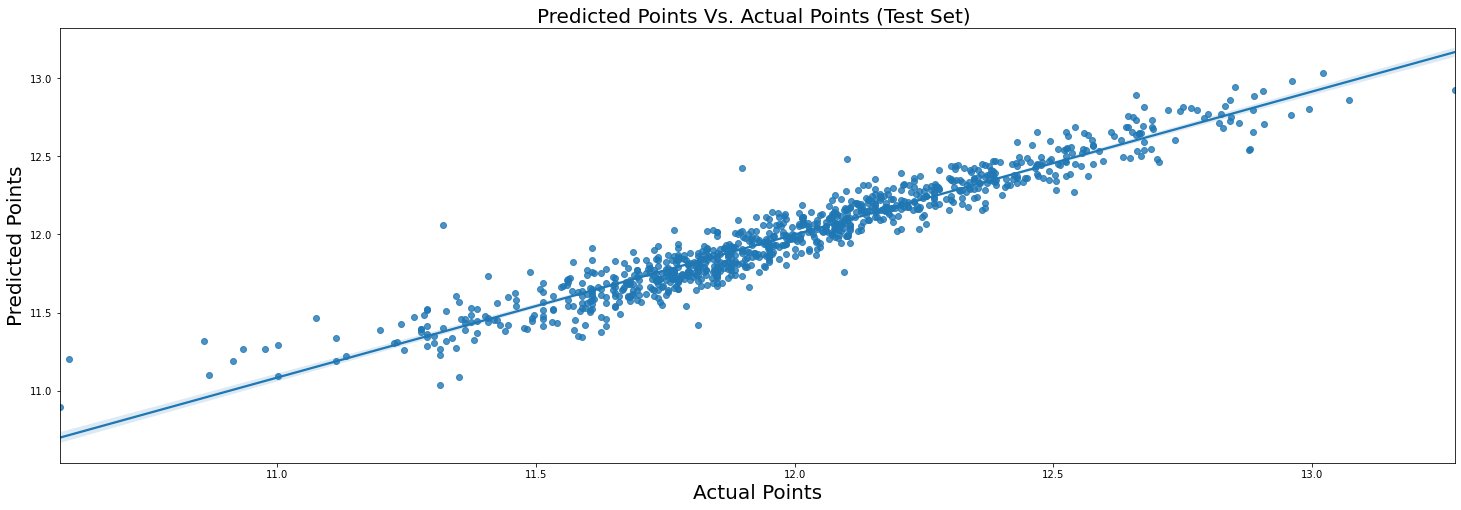

In [110]:
plt.figure(figsize=(25,8))
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points (Test Set) ' , fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 20})
plt.ylabel('Predicted Points', fontdict={'fontsize': 20})
plt.show()

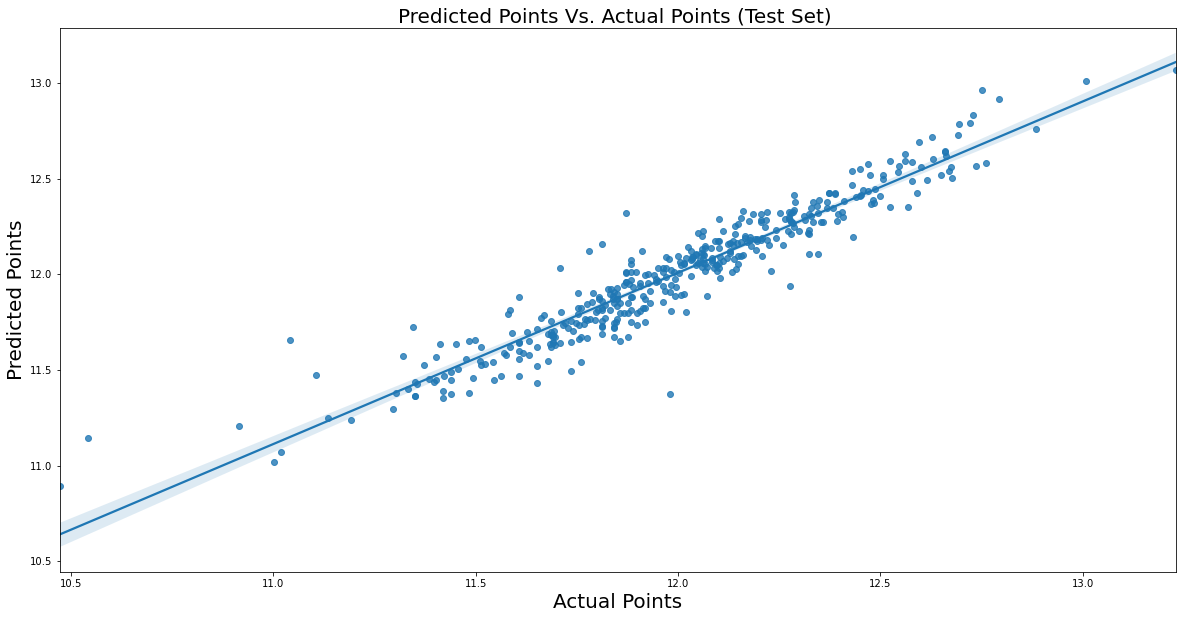

In [111]:
plt.figure(figsize=(20,10))
sns.regplot(x=y_test, y=y_test_pred)
plt.title('Predicted Points Vs. Actual Points (Test Set) ' , fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 20})
plt.ylabel('Predicted Points', fontdict={'fontsize': 20})
plt.show()

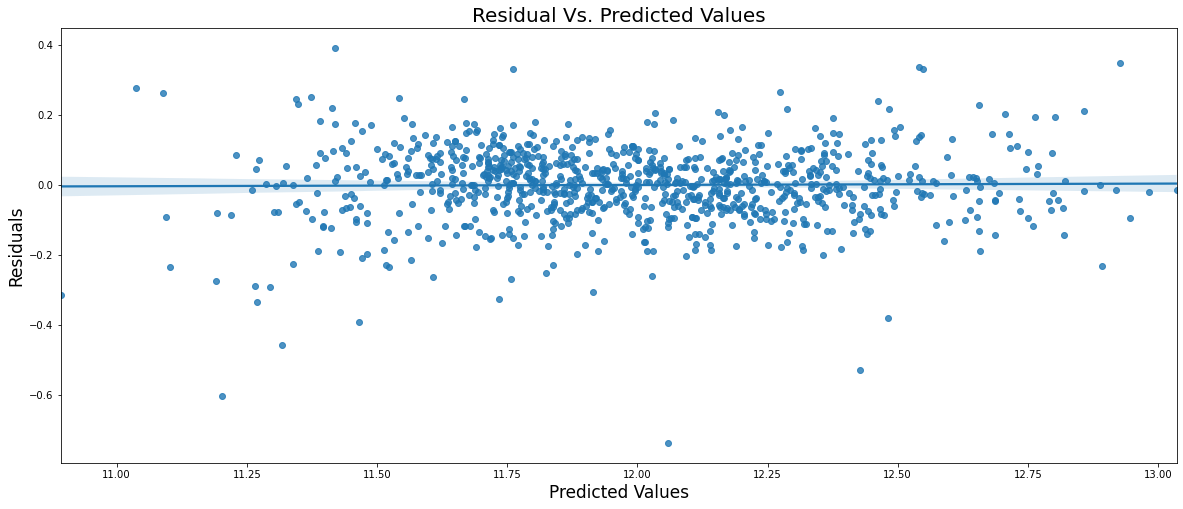

In [112]:
plt.figure(figsize=(20,8))
sns.regplot(x=y_train_pred, y=(y_train-y_train_pred))
plt.title('Residual Vs. Predicted Values', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 17})
plt.ylabel('Residuals', fontdict={'fontsize': 17})
plt.show()

### RFE

In [102]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]


In [103]:
lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

LinearRegression()

In [104]:
# running RFE

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [105]:
#getting the coefficient values

def find(x):
    return lasso_coeff_dict[x]

# Assign top 10 features to a temporary_data2 dataframe for further display in the bar plot

temporary_data2 = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
temporary_data2 = temporary_data2.loc[temporary_data2['rfe_support'] == True]
temporary_data2.reset_index(drop=True, inplace=True)

temporary_data2['Coefficient'] = temporary_data2['Features'].apply(find)
temporary_data2 = temporary_data2.sort_values(by=['Coefficient'], ascending=False)
temporary_data2 = temporary_data2.head(10)
temporary_data2

,Features,rfe_support,rfe_ranking,Coefficient
11,MSZoning_RL,True,1,0.106565
5,GrLivArea,True,1,0.100181
12,MSZoning_RM,True,1,0.076448
1,OverallQual,True,1,0.069656
9,MSZoning_FV,True,1,0.068896
4,TotalBsmtSF,True,1,0.046174
2,OverallCond,True,1,0.044992
14,Foundation_PConc,True,1,0.041865
7,GarageCars,True,1,0.036802
3,BsmtFinSF1,True,1,0.028571


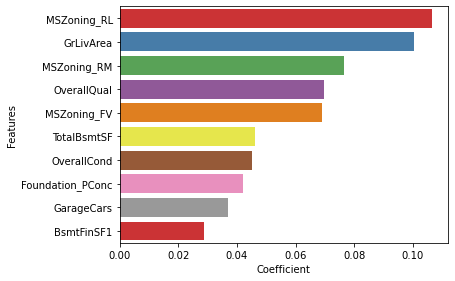

In [106]:
# Let's plot a bar plot to determine the variables that would affect pricing most using ridge regression

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = temporary_data2)
plt.show()

#### The above graph displays the top 10 variables based on the Lasso Regression model that are significant in predicting the price of a house.



## Conclusion:- 

The optimal lambda value in case of Ridge and Lasso is as below:

Ridge - 5 <br>
Lasso - 0.0004

r2_score for ridge regression<br>

y_train_pred=0.9189940223734436<br>
y_test_pred=0.9020030955419676<br>


r2_score for lasso regression<br>

y_train_pred=0.9188514370862617<br>
y_test_pred=0.9031919911918014<br>

The Mean Squared error in case of Ridge and Lasso are:

Ridge - 0.013633610832326911 <br>
Lasso - 0.013468208254564639


The Mean Squared Error of Lasso is slightly lower than that of Ridge.


Also, since Lasso helps in feature reduction (as the coefficient value of one of the feature became 0), Lasso has a better edge over Ridge.


Hence based on Lasso, the factors that generally affect the price are "BsmtFinSF1", "GarageCars", "MSZoning_RL", "GrLivArea", "MSZoning_RM", "OverallQual", "MSZoning_FV", "TotalBsmtSF", "OverallCond "and "Foundation_PConc"


Therefore, the variables predicted by Lasso in the above bar chart as significant variables for predicting the price of a house.

